## Ring-hydroxylating Dioxygenases

In [1]:
from protlearn import *

[nltk_data] Downloading package punkt to /Users/lucas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/lucas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lucas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/lucas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Create data frame from raw data and clean it
msa_file = 'pf00848-alignment.fasta'
msa = MSA()
msa.parse_msa_file(msa_file)
print(msa.raw_data.info)

<bound method DataFrame.info of                          0    1    2    3    4    5    6    7    8    9      
A0A1V1ZE67_9FLAO/178-361    -    -    -    -    -    -    -    -    -    -  \
A0A0J1DCU0_9BURK/170-416    -    -    -    -    -    -    -    -    -    -   
J2WKD9_9SPHN/182-387        -    -    -    -    -    -    -    -    -    -   
A0A1Q3AVG0_CEPFO/233-414    -    -    -    -    -    -    -    -    -    -   
A0A5N0VGT3_9PSEU/179-385    -    -    -    -    -    -    -    -    -    -   
...                       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
A0A109D4U5_9BURK/167-435    -    -    -    -    -    -    -    -    -    -   
Q63MU4_BURPS/184-418        -    -    -    -    -    -    -    -    -    -   
A0A1M7PUQ5_9ACTN/175-372    -    -    -    -    -    -    -    -    -    -   
A0A4Q4THZ6_9PEZI/248-366    -    -    -    -    -    -    -    -    -    -   
A0A318HGY1_9BURK/191-426    -    -    -    -    -    -    -    -    -    -   

                          ... 1

In [3]:
msa.map_positions()
print(msa.positions_map.keys())
# import json
# for header in msa.positions_map.keys():
#     if 'BPHA1_RHOJR' in header:
#         print(json.dumps(msa.positions_map[header], indent=4))
#         break

dict_keys(['A0A1V1ZE67_9FLAO/178-361', 'A0A0J1DCU0_9BURK/170-416', 'J2WKD9_9SPHN/182-387', 'A0A1Q3AVG0_CEPFO/233-414', 'A0A5N0VGT3_9PSEU/179-385', 'A0A2M8QHP4_9SPHN/170-438', 'A0A3N7F1M7_POPTR/242-370', 'A0A085TXN7_9RHOB/198-393', 'A0A1G9KK55_9GAMM/195-391', 'A0A287XI26_HORVV/179-273', 'A0A4Z1BWM5_9RHOB/170-397', 'A0A4P8ISH9_9BURK/174-408', 'A0A521EMG9_9RHOB/173-399', 'C3Z2U0_BRAFL/214-401', 'A0A516V1Z3_9GAMM/173-355', 'A0A553WJU6_9SPHN/162-393', 'A0A1B1YUU6_9GAMM/195-442', 'A0A257GLY2_9RHOB/172-368', 'A0A291GFX6_9RHOB/163-416', 'N6YYT3_9RHOO/170-440', 'A0A4Y9MMH6_9ACTN/170-451', 'A0A4Y9ELA6_9SPHN/174-372', 'A0A0Q6BLT6_9RHIZ/231-353', 'A0A2I2GLR6_9EURO/245-367', 'A0A6M8SU86_9NEIS/151-371', 'A0A3E0U426_9GAMM/137-378', 'A0A0B1ZKR1_9SPHN/200-469', 'A0A1E4S8T0_CYBJN/195-403', 'A0A2R8C0S0_9RHOB/184-426', 'A0A5N6T7K7_ASPPS/121-185', 'A0A385YZT7_9PSED/188-423', 'A0A0H4VEX4_9SPHN/157-423', 'A0A127ETT5_9RHIZ/179-432', 'T0HQV3_9SPHN/189-383', 'A0A4R5UKW1_9RHIZ/174-401', 'A0A1E3R8U7_9MYCO/158-421

In [4]:
msa.cleanse_data(plot=True)
print(msa.data.info)

<bound method DataFrame.info of      182 185 186 187 200 204 205 206 216 217  ... 838 841 845 848 851 853 982   
0      A   L   Y   C   E   G   F   H   V   H  ...   T   Y   V   Y   D   E   E  \
1      K   L   Y   M   D   P   Y   H   L   H  ...   Y   F   G   Y   E   D   D   
2      K   L   T   Y   E   N   Y   H   I   H  ...   L   Y   W   K   G   E   E   
3      K   V   F   C   D   G   Y   H   A   H  ...   Y   F   L   E   G   S   E   
4      K   V   V   N   E   C   Y   H   N   H  ...   W   F   V   A   D   A   Q   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
7562   K   L   M   Q   D   P   Y   H   L   H  ...   H   F   G   F   E   E   D   
7564   K   M   Y   L   D   T   V   H   T   H  ...   S   F   R   A   A   G   D   
7565   K   L   T   M   E   C   Y   H   N   H  ...   W   L   V   H   R   D   Q   
7566   K   L   V   V   D   F   Y   H   V   H  ...   V   F   V   D   N   S   Q   
7567   K   L   T   M   E   C   Y   H   N   H  ...   W   C   V   H   R   D   Q

In [5]:
msa.reduce(plot=True)
print(msa.coordinates.shape)

(6469, 2)


In [6]:
msa.label_sequences(method='single-linkage', min_clusters=3, plot=True)
print(msa.labels)

[3 2 3 ... 3 3 3]


In [7]:
# Perform feature selection on data
msa.select_features(n_estimators=1000, random_state=42, plot=True)
print(msa.selected_features)

Index(['182_K', '185_A', '185_F', '185_I', '185_L', '185_M', '185_N', '185_S',
       '185_T', '185_V',
       ...
       '987_F', '987_G', '987_H', '987_N', '987_P', '987_Q', '987_R', '987_S',
       '987_V', '987_W'],
      dtype='object', length=365)


In [8]:
msa.select_residues(top_n=3, plot=True)
print(msa.profiles)

                             200     784     982
A0A1V1ZE67_9FLAO/178-361  Glu203  Asn281  Glu319
A0A0J1DCU0_9BURK/170-416  Asp214  Arg314  Asp360
J2WKD9_9SPHN/182-387      Glu207  His301  Glu345
A0A1Q3AVG0_CEPFO/233-414  Asp258  Asn331  Glu373
A0A5N0VGT3_9PSEU/179-385  Glu205  Trp299  Gln342
...                          ...     ...     ...
A0A0U2W2M2_9BACL/180-414  Asp213  Arg315  Asp361
A0A0D2F7S1_9EURO/266-339    Asp?    Arg?  Asp297
A0A1H9HAA7_9RHOB/175-394  Glu207  Phe312  Gln358
A0A3P5WIK8_9RHOB/172-374  Asp197  Ile289  Gln332
A0A2A7NE45_MYCAG/190-419  Glu216  Phe334  Gln377

[6469 rows x 3 columns]


In [9]:
msa.generate_wordclouds(path_to_metadata='pf00848-metadata.tsv', plot=True)

In [10]:
msa.generate_logos(plot=True)

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

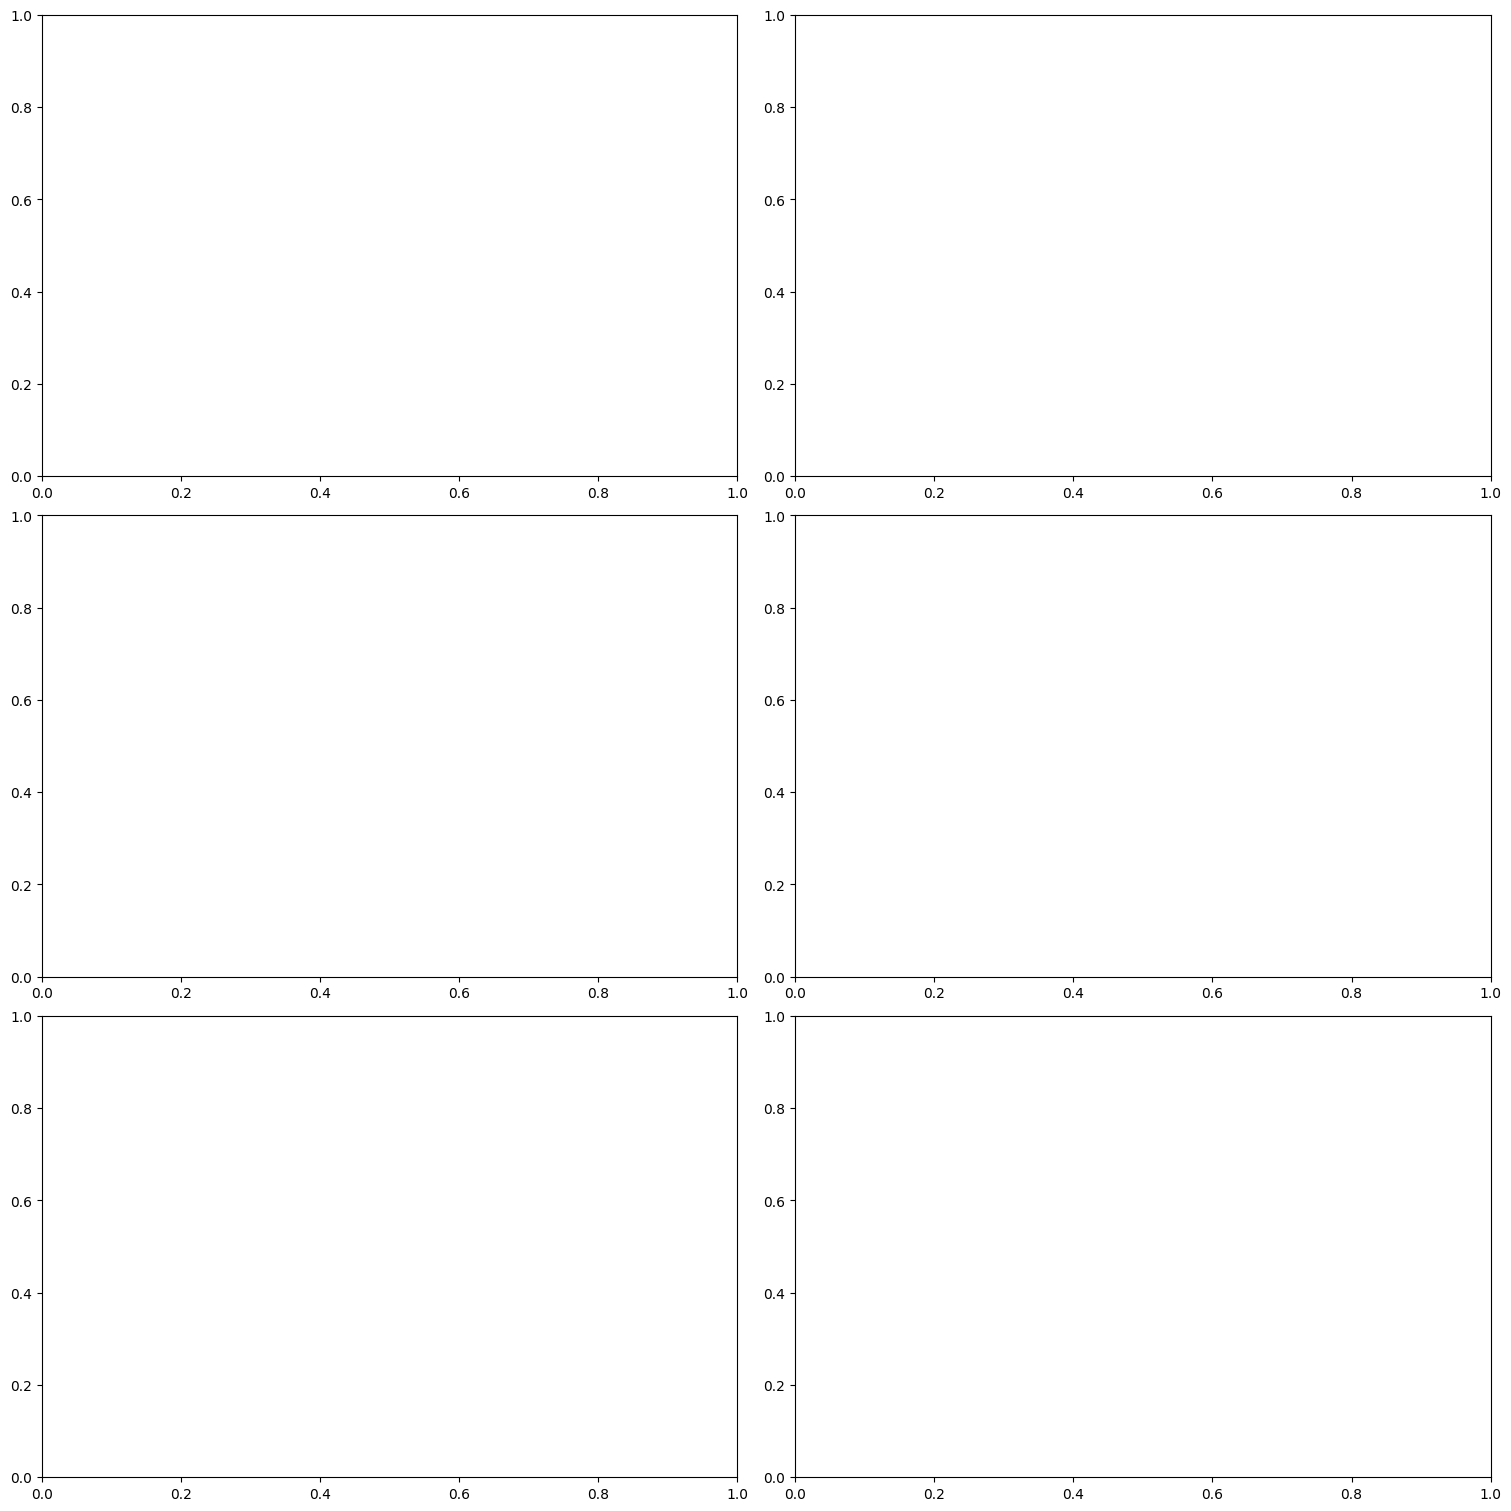

In [11]:
msa.generate_visualizations()